In [1]:
%load_ext autoreload
%autoreload 2

## 12 series connected Si cells varying temperature

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pvcircuit as pvc
TK = pvc.junction.TK # use simple function here
from pvmismatch import *

In [3]:
cell = pvcell.PVcell(pvconst=pvconstants.PVconstants(npts=1001))
cell.Ee = 1
cell.Tcell = TK(25)

In [4]:
Icells, Vcells, Pcells = cell.calcCell()
cell.Isc, cell.Voc, np.amax(Pcells)

(6.3056, 0.6744404229078165, 3.3466804327948787)

(-5.0, 7.0)

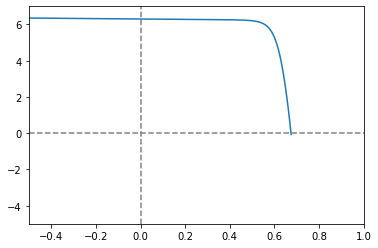

In [5]:
fig, ax = plt.subplots(1,1)
ax.plot(Vcells, Icells)
ax.axvline(0, ls='--', c='gray')
ax.axhline(0, ls='--', c='gray')
ax.set_xlim(-.5,1)
ax.set_ylim(-5,7)

In [6]:
A=153.33
Jsc = cell.Isc/A/cell.Ee
Jpc = cell.Isc0_T0/A
Jsc, Jpc

(0.041124372268962366, 0.041124372268962366)

In [7]:
J01 = cell.Isat1_T0/A
J02 = cell.Isat2_T0/A
Rser = cell.Rs*A
Gsh = 1./(cell.Rsh*A)
J01, J02, Rser, Gsh

(1.4910246926586056e-13,
 7.28790870913928e-09,
 0.6542954145980419,
 0.0006513892474488763)

In [8]:
cellJG = pvc.Multi2T(name='cellJG', Eg_list = [1.1], area = 153.33, Jext=Jpc, Rser = Rser)
cellJG.j[0]._J0init([J01,J02])
cellJG.j[0].update(Gsh=Gsh)
cellJG

cellJG: <tandem.Multi2T class>
T = 25.0 C, Rser= 0.654295 Ω cm2

j[0]: <tandem.Junction class>
Eg = 1.10 eV, TC = 25.0 C
Jext = 41.1 , JLC = 0.0 mA/cm2
Gsh = 0.000651389 S/cm2, Rser = 0 Ωcm2
lightA = 153.33 cm2, totalA = 153.33 cm2
pn = -1, beta = 0, gamma = 0
   n    J0ratio   J0(A/cm2) 
  db       1      1.314e-16 
 1.00   1134.61   1.491e-13 
 2.00    20.10    7.288e-09 

In [9]:
MPP = cellJG.MPP()
MPP['Isc'], MPP['Voc'], MPP['Pmp']

 0.0825 s


(6.302914760240004, 0.6741318536784232, 3.345205352066622)

 0.0848 s
 0.4823 s


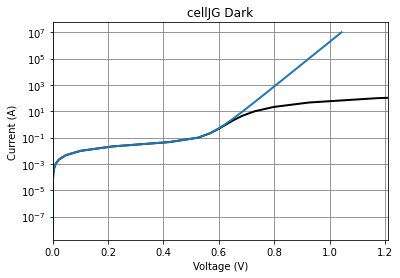

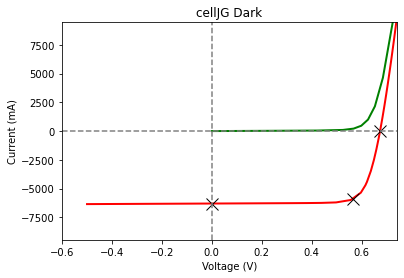

In [10]:
dfig, lfig, dax, lax, Vlight, Ilight = cellJG.plot()

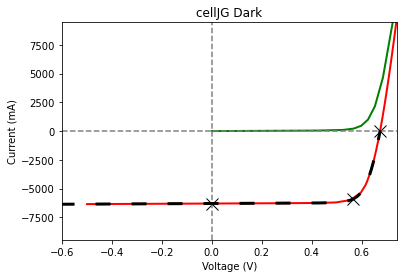

In [11]:
lax.plot(Vcells, -Icells*1000.,ls=(0,(5,7)), lw=3, c='black')
lfig

In [12]:
cell.Ee = 1e-9
lolog = -5
hilog = 3
pdec = 3
dpnts=((hilog-lolog)*pdec+1)
Idark = np.logspace(lolog, hilog, num=dpnts)
Vdark = np.full(dpnts, np.nan, dtype=np.float64)

for ii, I in enumerate(Idark):
    Vdark[ii] = cell.calcVcell(-I)

dax.set_ylim(1e-5, 1e3)
dax.plot(Vdark, Idark, ls='--', lw=4, c='white')
iv = zip(Idark, Vdark)
for I,V in iv: print('{0:.3e}  {1:.3e}'.format(I,V))

1.000e-05  1.113e-04
2.154e-05  2.270e-04
4.642e-05  4.761e-04
1.000e-04  1.013e-03
2.154e-04  2.169e-03
4.642e-04  4.660e-03
1.000e-03  1.003e-02
2.154e-03  2.159e-02
4.642e-03  4.650e-02
1.000e-02  1.002e-01
2.154e-02  2.151e-01
4.642e-02  4.212e-01
1.000e-01  5.251e-01
2.154e-01  5.682e-01
4.642e-01  5.989e-01
1.000e+00  6.259e-01
2.154e+00  6.535e-01
4.642e+00  6.858e-01
1.000e+01  7.292e-01
2.154e+01  7.989e-01
4.642e+01  9.252e-01
1.000e+02  1.174e+00
2.154e+02  1.686e+00
4.642e+02  2.768e+00
1.000e+03  nan


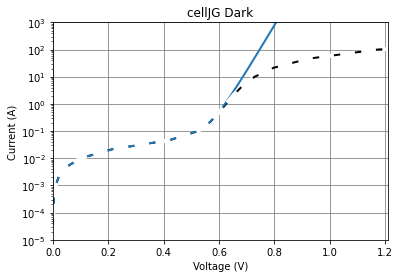

In [13]:
# note PVmismatch does not do well on dark IV maybe Brent better than Newton?
dfig